In [4]:
import numpy as np
import warnings
import sys
import pandas as pd
import scipy
from scipy.io import arff
if not sys.warnoptions:
    warnings.simplefilter("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [2]:
data, meta = scipy.io.arff.loadarff('../mtr-datasets/atp7d.arff')
data = pd.DataFrame(data)
data.head()

,"""'departwb'""","""'departdaytype'""","""'fetchdays'""","""'fetchdow'""","""'dtd'""","""'ALLminpA'""","""'ALLminpA'l1""","""'ALLminpA'l2""","""'ALLminpA'l7""","""'ALLavgpA'""",...,"""fdisoweekday4""","""fdisoweekday5""","""fdisoweekday6""","""fdisoweekday7""",LBL+ALLminpA+bt7d_000,LBL+ALLminp0+bt7d_000,LBL+aDLminpA+bt7d_000,LBL+aCOminpA+bt7d_000,LBL+aFLminpA+bt7d_000,LBL+aUAminpA+bt7d_000
0,72.0,1.0,60.0,3.0,12.0,359.0,372.0,351.0,317.0,615.96,...,0.0,0.0,0.0,0.0,326.0,675.0,626.0,545.0,326.0,545.0
1,79.0,1.0,69.0,5.0,10.0,336.0,298.0,298.0,320.0,616.73,...,0.0,1.0,0.0,0.0,315.0,675.0,631.0,587.0,315.0,587.0
2,79.0,1.0,70.0,6.0,9.0,336.0,336.0,298.0,320.0,628.87,...,0.0,0.0,1.0,0.0,315.0,675.0,631.0,587.0,315.0,587.0
3,79.0,1.0,71.0,7.0,8.0,336.0,336.0,336.0,330.0,632.73,...,0.0,0.0,0.0,1.0,315.0,675.0,631.0,587.0,315.0,587.0
4,79.0,1.0,72.0,1.0,7.0,336.0,336.0,336.0,330.0,635.47,...,0.0,0.0,0.0,0.0,315.0,1182.0,720.0,720.0,315.0,720.0


In [10]:
target = data.iloc[:,-6:]
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = target.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(target.values, i) 
                          for i in range(len(target.columns))] 
  
print(vif_data)

                 feature         VIF
0  LBL+ALLminpA+bt7d_000   97.179449
1  LBL+ALLminp0+bt7d_000   17.519475
2  LBL+aDLminpA+bt7d_000   45.174286
3  LBL+aCOminpA+bt7d_000  785.220795
4  LBL+aFLminpA+bt7d_000   89.726108
5  LBL+aUAminpA+bt7d_000  738.547258


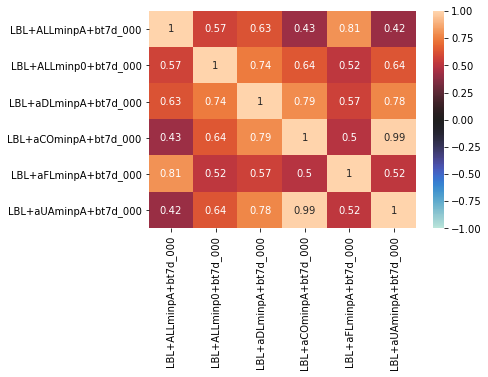

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
# Compute the correlation matrix
corr = target.corr()

sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center= 0)
